### Importing Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, roc_auc_score, accuracy_score, precision_score, recall_score, fbeta_score
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings("ignore")


df=pd.read_csv("Ransomware.csv",sep='|')

### Dataset Exploration

In [3]:
df

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [4]:
df.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [5]:
# Checking the size of dataframe
from sys import getsizeof
initial_size = getsizeof(df)/(1024.0**3)
print("Size of DataFrame: {} GB".format(initial_size))

Size of DataFrame: 0.0798260634765029 GB


### Null value check

In [6]:
df.isnull().sum()

,0
Name,0
md5,0
Machine,0
SizeOfOptionalHeader,0
Characteristics,0
MajorLinkerVersion,0
MinorLinkerVersion,0
SizeOfCode,0
SizeOfInitializedData,0
SizeOfUninitializedData,0


### Distribution of Labelled Data

In [7]:
df.legitimate.value_counts() #1 means legitimate, 0 means malware

,count
legitimate,
0,96724
1,41323


In [8]:
# Converting labelled data in categories datatype
df.legitimate = df.legitimate.astype('category')
df.legitimate

,legitimate
0,1
1,1
2,1
3,1
4,1
...,...
138042,0
138043,0
138044,0
138045,0


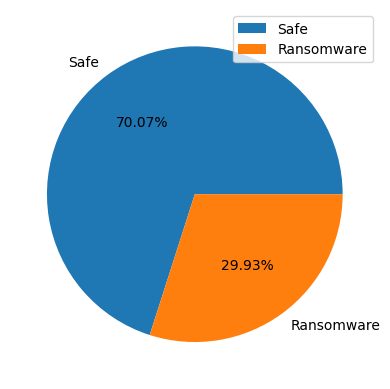

In [9]:
plt.pie(df.legitimate.value_counts().values.tolist(), labels=['Safe','Ransomware'], autopct='%.2f%%')
plt.legend()
plt.show()

### Unique names

In [10]:
df.md5.nunique()

138047

In [11]:
df.md5.shape[0]

138047

In [12]:
# There are no same files as no 2 files can have same md5 without the same content

### Column Analysis

In [13]:
df.shape[1]

57

In [14]:
df.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [15]:
df.dtypes

,0
Name,object
md5,object
Machine,int64
SizeOfOptionalHeader,int64
Characteristics,int64
MajorLinkerVersion,int64
MinorLinkerVersion,int64
SizeOfCode,int64
SizeOfInitializedData,int64
SizeOfUninitializedData,int64


#Feature Selection

<Axes: >

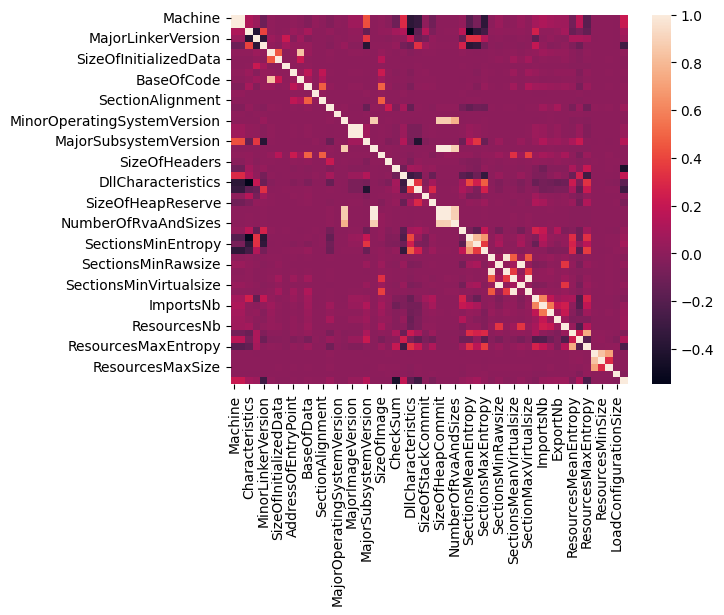

In [16]:
sns.heatmap(df.corr(numeric_only=True))

In [17]:
training_copy = df.copy()

In [18]:
training_copy.drop(['legitimate','md5','Name'],axis=1, inplace=True)

In [19]:
#Z-Score Standardization


sc = StandardScaler()

scaled_data = training_copy.copy()
scaled_data_2 = training_copy.copy()

scaled_data_2 = sc.fit_transform(scaled_data_2)

scaled_data_2 = pd.DataFrame(scaled_data_2, columns = scaled_data.columns)

"""
for col in [column for column in training_copy.columns]:
    sc.fit(training_copy[[col]])
    scaled_data[col] = sc.transform(training_copy[[col]])
"""

training_copy = scaled_data_2.copy()

In [20]:
training_copy.head()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,-0.360934,-0.360378,-0.511332,0.092993,-0.321959,0.020747,-0.015930,-0.006173,-0.048337,-0.009715,...,-0.093911,-0.132246,-0.662461,0.164672,-1.241814,-0.005982,-0.002763,-0.010756,-0.017849,0.534926
1,-0.360934,-0.360378,-0.136091,0.092993,-0.321959,-0.019469,-0.020485,-0.006173,-0.026287,-0.009715,...,-0.093911,-0.146898,0.224923,1.209213,-0.276345,-0.007003,-0.002716,-0.011551,-0.017846,0.829093
2,-0.360934,-0.360378,-0.136091,0.092993,-0.321959,0.047706,0.008141,-0.006173,0.052161,-0.009715,...,-0.089944,-0.080961,0.382935,0.505052,-0.156377,-0.003122,-0.002780,0.001119,-0.017846,0.829093
3,-0.360934,-0.360378,-0.511332,0.092993,-0.321959,0.059629,-0.003870,-0.006173,0.081416,-0.009715,...,-0.089944,-0.088288,0.327198,0.287862,0.550339,-0.006923,-0.002782,-0.011404,-0.017846,0.829093
4,-0.360934,-0.360378,-0.511332,0.092993,-0.321959,0.009091,-0.009668,-0.006173,0.013241,-0.009715,...,-0.089944,-0.146898,0.274914,1.210260,-0.207216,-0.006972,-0.002665,-0.011544,-0.017846,0.829093


In [21]:
#Variance threshold


selector = VarianceThreshold(threshold=1)


selector.fit(training_copy)

VarianceThreshold(threshold=1)

In [22]:
selector.get_support()

array([False,  True, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False])

In [23]:
training_copy.head()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,-0.360934,-0.360378,-0.511332,0.092993,-0.321959,0.020747,-0.015930,-0.006173,-0.048337,-0.009715,...,-0.093911,-0.132246,-0.662461,0.164672,-1.241814,-0.005982,-0.002763,-0.010756,-0.017849,0.534926
1,-0.360934,-0.360378,-0.136091,0.092993,-0.321959,-0.019469,-0.020485,-0.006173,-0.026287,-0.009715,...,-0.093911,-0.146898,0.224923,1.209213,-0.276345,-0.007003,-0.002716,-0.011551,-0.017846,0.829093
2,-0.360934,-0.360378,-0.136091,0.092993,-0.321959,0.047706,0.008141,-0.006173,0.052161,-0.009715,...,-0.089944,-0.080961,0.382935,0.505052,-0.156377,-0.003122,-0.002780,0.001119,-0.017846,0.829093
3,-0.360934,-0.360378,-0.511332,0.092993,-0.321959,0.059629,-0.003870,-0.006173,0.081416,-0.009715,...,-0.089944,-0.088288,0.327198,0.287862,0.550339,-0.006923,-0.002782,-0.011404,-0.017846,0.829093
4,-0.360934,-0.360378,-0.511332,0.092993,-0.321959,0.009091,-0.009668,-0.006173,0.013241,-0.009715,...,-0.089944,-0.146898,0.274914,1.210260,-0.207216,-0.006972,-0.002665,-0.011544,-0.017846,0.829093


In [24]:
constant_columns = [column for column in training_copy.columns
                    if column not in training_copy.columns[selector.get_support()]]

print(len(constant_columns))



40


In [25]:
for column in constant_columns:
    print(column)

Machine
Characteristics
MinorLinkerVersion
SizeOfCode
SizeOfInitializedData
SizeOfUninitializedData
BaseOfCode
BaseOfData
ImageBase
FileAlignment
MajorOperatingSystemVersion
MajorImageVersion
MinorImageVersion
MajorSubsystemVersion
MinorSubsystemVersion
SizeOfImage
CheckSum
Subsystem
DllCharacteristics
SizeOfStackCommit
SizeOfHeapReserve
SizeOfHeapCommit
NumberOfRvaAndSizes
SectionsNb
SectionsMeanEntropy
SectionsMinRawsize
SectionsMeanVirtualsize
SectionMaxVirtualsize
ImportsNbDLL
ImportsNb
ImportsNbOrdinal
ExportNb
ResourcesNb
ResourcesMeanEntropy
ResourcesMaxEntropy
ResourcesMeanSize
ResourcesMinSize
ResourcesMaxSize
LoadConfigurationSize
VersionInformationSize


In [26]:
columns_to_drop = constant_columns

training_copy.drop(columns_to_drop, axis=1, inplace=True)

#End of Variance Threshold

In [27]:
training_copy.head()

,SizeOfOptionalHeader,MajorLinkerVersion,AddressOfEntryPoint,SectionAlignment,MinorOperatingSystemVersion,SizeOfHeaders,SizeOfStackReserve,LoaderFlags,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionMaxRawsize,SectionsMinVirtualsize,ResourcesMinEntropy
0,-0.360378,0.092993,-0.048337,-0.005158,-0.014094,-0.048946,0.213202,-0.004052,0.735747,0.251019,-0.016475,-0.010826,-0.057018,0.164672
1,-0.360378,0.092993,-0.026287,-0.005158,-0.001199,-0.048946,0.213202,-0.004052,0.062176,-0.375377,-0.019595,-0.017296,-0.054354,1.209213
2,-0.360378,0.092993,0.052161,-0.005158,-0.001199,-0.048946,0.213202,-0.004052,1.433258,0.614812,0.011151,-0.004441,0.001009,0.505052
3,-0.360378,0.092993,0.081416,-0.005158,-0.001199,-0.048946,0.213202,-0.004052,1.846697,0.609040,0.002679,-0.002160,-0.016625,0.287862
4,-0.360378,0.092993,0.013241,-0.005158,-0.001199,-0.048946,0.213202,-0.004052,1.049550,0.621848,-0.007630,-0.011830,-0.052999,1.210260


In [28]:
# Using VIF to remove highly correlated columns



cols_vif = training_copy.columns.tolist()

"""
cols_vif.remove('legitimate')
cols_vif.remove('md5')
cols_vif.remove('Name')
cols_vif

"""

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = cols_vif

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(training_copy[cols_vif].values, i)
                          for i in range(len(cols_vif))]

print(vif_data)



                        feature        VIF
0          SizeOfOptionalHeader   1.241865
1            MajorLinkerVersion   1.151895
2           AddressOfEntryPoint   1.037350
3              SectionAlignment   1.034590
4   MinorOperatingSystemVersion   4.037322
5                 SizeOfHeaders   1.002437
6            SizeOfStackReserve   1.189110
7                   LoaderFlags   4.036734
8            SectionsMinEntropy   1.309148
9            SectionsMaxEntropy   1.414426
10          SectionsMeanRawsize  19.522240
11            SectionMaxRawsize  19.483179
12       SectionsMinVirtualsize   1.046508
13          ResourcesMinEntropy   1.081008


In [29]:
cols_vif_copy = training_copy.columns.tolist()

"""
cols_vif.remove('legitimate')
cols_vif.remove('md5')
cols_vif.remove('Name')
cols_vif

"""

cols_vif_copy.remove('SectionsMeanRawsize')
cols_vif_copy.remove('SectionMaxRawsize')

# VIF dataframe
vif_data_copy = pd.DataFrame()
vif_data_copy["feature"] = cols_vif_copy

# calculating VIF for each feature
vif_data_copy["VIF"] = [variance_inflation_factor(training_copy[cols_vif_copy].values, i)
                          for i in range(len(cols_vif_copy))]

print(vif_data_copy)



                        feature       VIF
0          SizeOfOptionalHeader  1.241847
1            MajorLinkerVersion  1.151859
2           AddressOfEntryPoint  1.037325
3              SectionAlignment  1.034589
4   MinorOperatingSystemVersion  4.037321
5                 SizeOfHeaders  1.002421
6            SizeOfStackReserve  1.189090
7                   LoaderFlags  4.036734
8            SectionsMinEntropy  1.309127
9            SectionsMaxEntropy  1.414318
10       SectionsMinVirtualsize  1.023769
11          ResourcesMinEntropy  1.080613


In [30]:
print(vif_data['VIF'] > 10 )

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11     True
12    False
13    False
Name: VIF, dtype: bool


In [31]:
training_copy['legitimate'] = df['legitimate']

A_Trainer = training_copy.copy() # Has Max
B_Trainer = training_copy.copy() # Has Mean
Z_Trainer = training_copy.copy() # Control Group

A_Trainer.drop(['SectionsMeanRawsize'],axis=1, inplace=True)
B_Trainer.drop(['SectionMaxRawsize'],axis=1, inplace=True)
Z_Trainer.drop(['SectionsMeanRawsize','SectionMaxRawsize'],axis=1, inplace=True)

In [32]:
A_Trainer.head()

,SizeOfOptionalHeader,MajorLinkerVersion,AddressOfEntryPoint,SectionAlignment,MinorOperatingSystemVersion,SizeOfHeaders,SizeOfStackReserve,LoaderFlags,SectionsMinEntropy,SectionsMaxEntropy,SectionMaxRawsize,SectionsMinVirtualsize,ResourcesMinEntropy,legitimate
0,-0.360378,0.092993,-0.048337,-0.005158,-0.014094,-0.048946,0.213202,-0.004052,0.735747,0.251019,-0.010826,-0.057018,0.164672,1
1,-0.360378,0.092993,-0.026287,-0.005158,-0.001199,-0.048946,0.213202,-0.004052,0.062176,-0.375377,-0.017296,-0.054354,1.209213,1
2,-0.360378,0.092993,0.052161,-0.005158,-0.001199,-0.048946,0.213202,-0.004052,1.433258,0.614812,-0.004441,0.001009,0.505052,1
3,-0.360378,0.092993,0.081416,-0.005158,-0.001199,-0.048946,0.213202,-0.004052,1.846697,0.609040,-0.002160,-0.016625,0.287862,1
4,-0.360378,0.092993,0.013241,-0.005158,-0.001199,-0.048946,0.213202,-0.004052,1.049550,0.621848,-0.011830,-0.052999,1.210260,1


In [33]:
B_Trainer.head()

,SizeOfOptionalHeader,MajorLinkerVersion,AddressOfEntryPoint,SectionAlignment,MinorOperatingSystemVersion,SizeOfHeaders,SizeOfStackReserve,LoaderFlags,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinVirtualsize,ResourcesMinEntropy,legitimate
0,-0.360378,0.092993,-0.048337,-0.005158,-0.014094,-0.048946,0.213202,-0.004052,0.735747,0.251019,-0.016475,-0.057018,0.164672,1
1,-0.360378,0.092993,-0.026287,-0.005158,-0.001199,-0.048946,0.213202,-0.004052,0.062176,-0.375377,-0.019595,-0.054354,1.209213,1
2,-0.360378,0.092993,0.052161,-0.005158,-0.001199,-0.048946,0.213202,-0.004052,1.433258,0.614812,0.011151,0.001009,0.505052,1
3,-0.360378,0.092993,0.081416,-0.005158,-0.001199,-0.048946,0.213202,-0.004052,1.846697,0.609040,0.002679,-0.016625,0.287862,1
4,-0.360378,0.092993,0.013241,-0.005158,-0.001199,-0.048946,0.213202,-0.004052,1.049550,0.621848,-0.007630,-0.052999,1.210260,1


In [34]:
Z_Trainer.head()

,SizeOfOptionalHeader,MajorLinkerVersion,AddressOfEntryPoint,SectionAlignment,MinorOperatingSystemVersion,SizeOfHeaders,SizeOfStackReserve,LoaderFlags,SectionsMinEntropy,SectionsMaxEntropy,SectionsMinVirtualsize,ResourcesMinEntropy,legitimate
0,-0.360378,0.092993,-0.048337,-0.005158,-0.014094,-0.048946,0.213202,-0.004052,0.735747,0.251019,-0.057018,0.164672,1
1,-0.360378,0.092993,-0.026287,-0.005158,-0.001199,-0.048946,0.213202,-0.004052,0.062176,-0.375377,-0.054354,1.209213,1
2,-0.360378,0.092993,0.052161,-0.005158,-0.001199,-0.048946,0.213202,-0.004052,1.433258,0.614812,0.001009,0.505052,1
3,-0.360378,0.092993,0.081416,-0.005158,-0.001199,-0.048946,0.213202,-0.004052,1.846697,0.609040,-0.016625,0.287862,1
4,-0.360378,0.092993,0.013241,-0.005158,-0.001199,-0.048946,0.213202,-0.004052,1.049550,0.621848,-0.052999,1.210260,1


<Axes: >

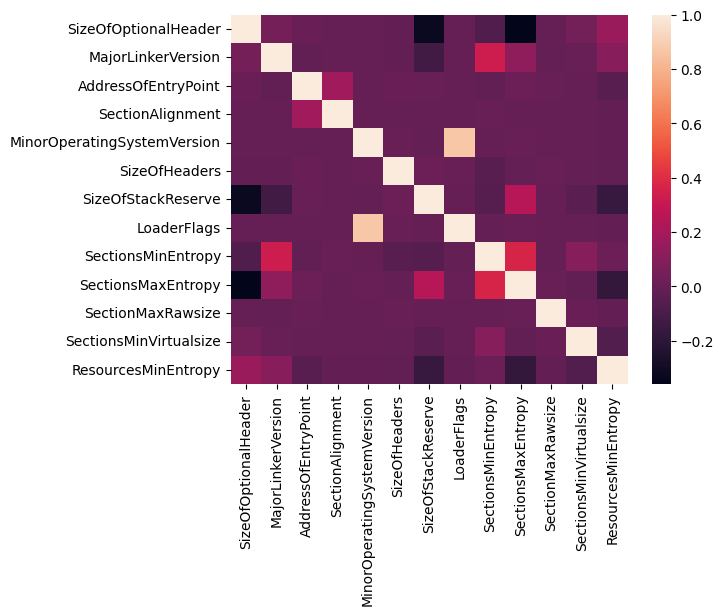

In [35]:
sns.heatmap(A_Trainer.corr(numeric_only=True))

<Axes: >

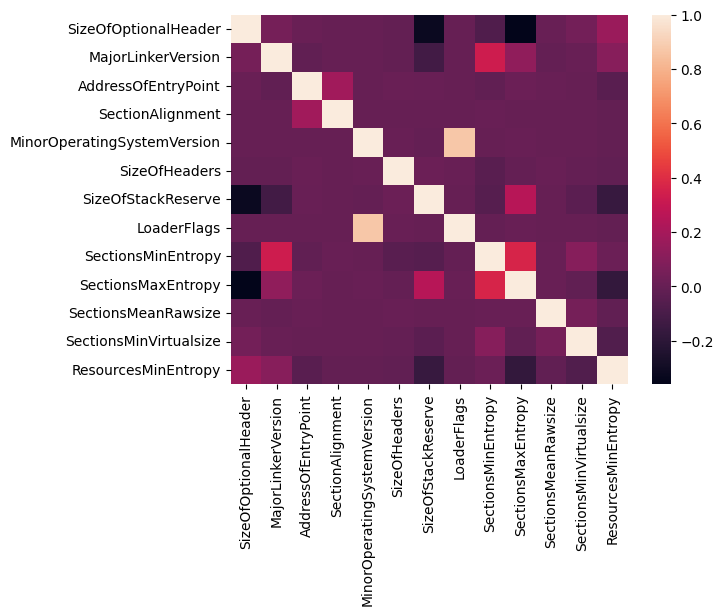

In [36]:
sns.heatmap(B_Trainer.corr(numeric_only=True))

<Axes: >

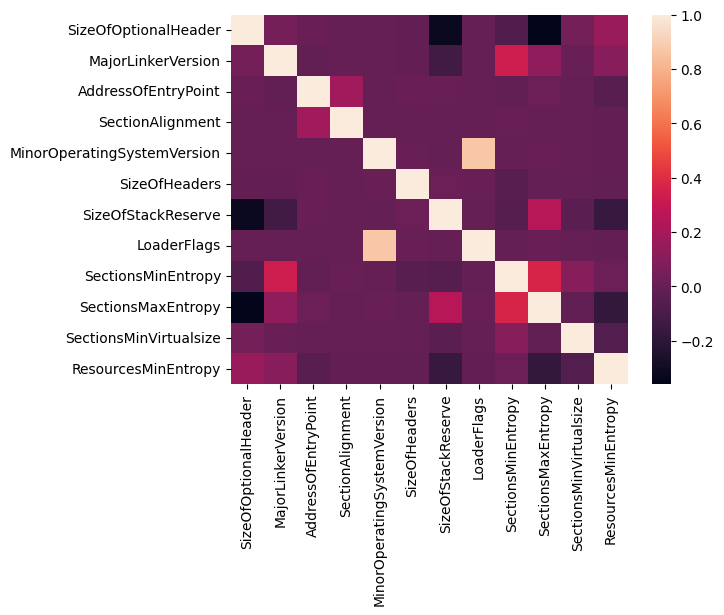

In [37]:
sns.heatmap(Z_Trainer.corr(numeric_only=True))

#Evaluation, Pre-processing and ROC-AUC Functions For Ease of Use

In [38]:
def preprocess_data(df):
    df['legitimate'] = df['legitimate'].astype('category')
    feature_cols_A = ['SizeOfOptionalHeader', 'MajorLinkerVersion', 'AddressOfEntryPoint',
                      'SectionAlignment', 'MinorOperatingSystemVersion', 'SizeOfHeaders',
                      'SizeOfStackReserve', 'LoaderFlags', 'SectionsMinEntropy',
                      'SectionsMaxEntropy', 'SectionMaxRawsize', 'SectionsMinVirtualsize',
                      'ResourcesMinEntropy']
    feature_cols_B = ['SizeOfOptionalHeader', 'MajorLinkerVersion', 'AddressOfEntryPoint',
                      'SectionAlignment', 'MinorOperatingSystemVersion', 'SizeOfHeaders',
                      'SizeOfStackReserve', 'LoaderFlags', 'SectionsMinEntropy',
                      'SectionsMaxEntropy', 'SectionsMeanRawsize', 'SectionsMinVirtualsize',
                      'ResourcesMinEntropy']


    X_A = df[feature_cols_A]
    y_A = df['legitimate']
    X_B = df[feature_cols_B]
    y_B = df['legitimate']

    return (X_A, y_A, X_B, y_B)

X_A, y_A, X_B, y_B = preprocess_data(df)

In [39]:
# Function to evaluate a classifier
def evaluate_classifier(name, classifier, X, y):
    print(f"Evaluating {name}...")
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f_beta': [],
        'roc_auc': []
    }

    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        y_prob = classifier.predict_proba(X_test)[:, 1] if hasattr(classifier, 'predict_proba') else None

        metrics['accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['precision'].append(precision_score(y_test, y_pred))
        metrics['recall'].append(recall_score(y_test, y_pred))
        metrics['f_beta'].append(fbeta_score(y_test, y_pred, beta=1))
        if y_prob is not None:
            metrics['roc_auc'].append(roc_auc_score(y_test, y_prob))

    print(f"{name} - Accuracy: {np.mean(metrics['accuracy']):.2f}, Precision: {np.mean(metrics['precision']):.2f}, Recall: {np.mean(metrics['recall']):.2f}, F-Beta: {np.mean(metrics['f_beta']):.2f}, ROC AUC: {np.mean(metrics['roc_auc']):.2f}")
    return classifier

In [40]:
# Function to plot ROC curves grouped by classifier
def plot_classifier_roc_curves(classifiers, X, y):
    for name, classifier in classifiers:
        plt.figure(figsize=(10, 8))
        kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

        for train_idx, test_idx in kf.split(X, y):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            classifier.fit(X_train, y_train)
            viz = RocCurveDisplay.from_estimator(classifier, X_test, y_test, alpha=0.3)
            plt.plot(viz.fpr, viz.tpr, alpha=0.3, label='Fold')

        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curves for {name}')
        plt.legend(loc='lower right')
        plt.show()

#Execution


Evaluating Decision Tree...
Decision Tree - Accuracy: 0.99, Precision: 0.98, Recall: 0.98, F-Beta: 0.98, ROC AUC: 0.99
Evaluating Random Forest...
Random Forest - Accuracy: 0.99, Precision: 0.99, Recall: 0.99, F-Beta: 0.99, ROC AUC: 1.00
Evaluating Naive Bayes...
Naive Bayes - Accuracy: 0.30, Precision: 0.30, Recall: 0.99, F-Beta: 0.46, ROC AUC: 0.82
Evaluating Logistic Regression...
Logistic Regression - Accuracy: 0.87, Precision: 0.84, Recall: 0.70, F-Beta: 0.75, ROC AUC: 0.83


<Figure size 1000x800 with 0 Axes>

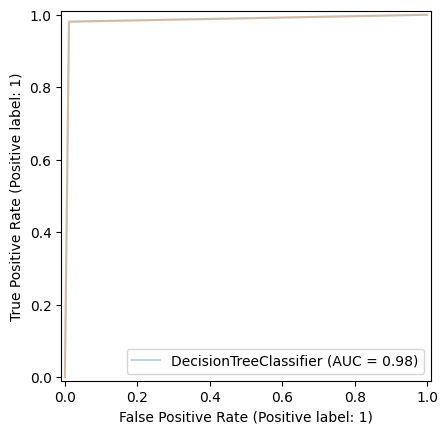

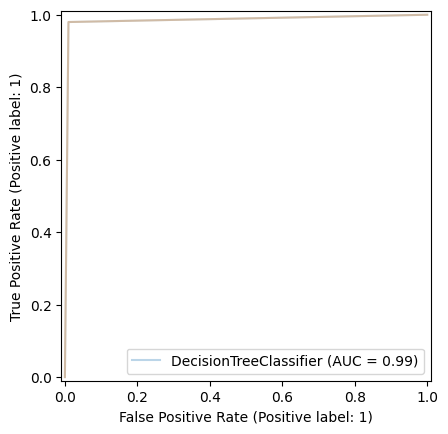

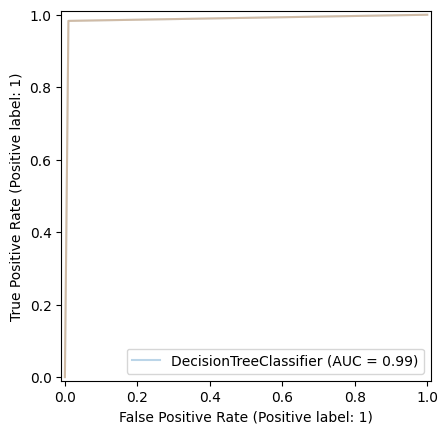

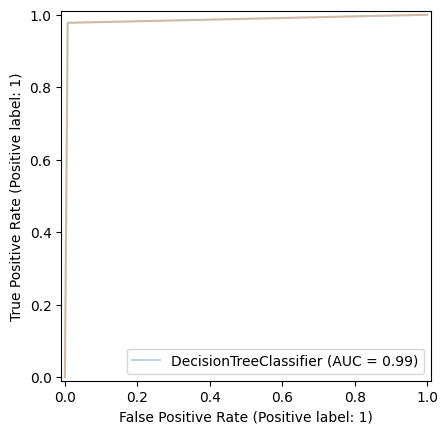

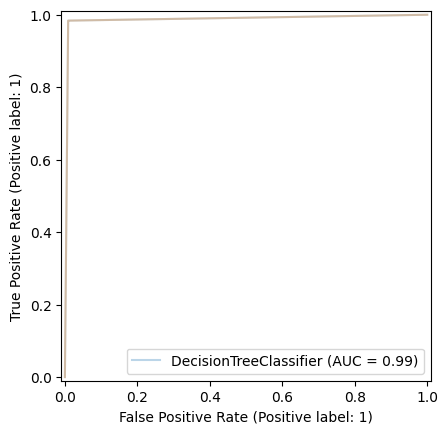

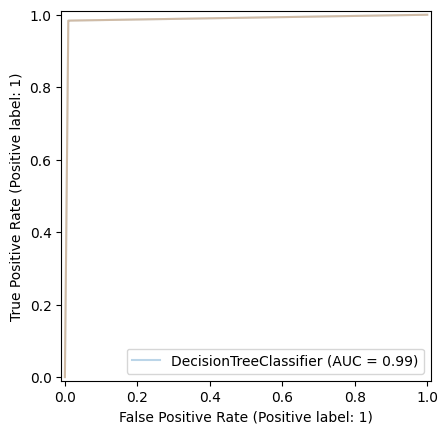

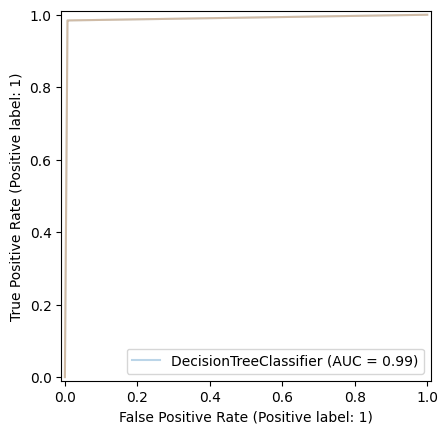

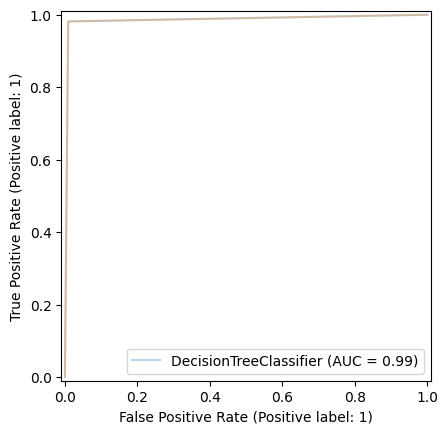

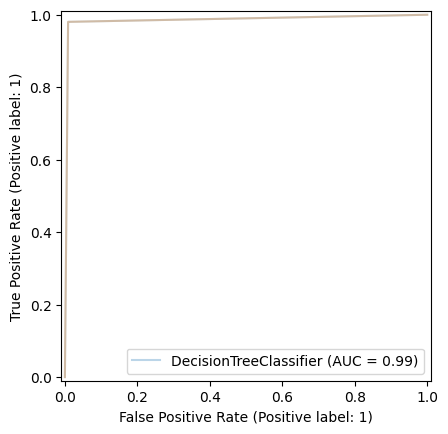

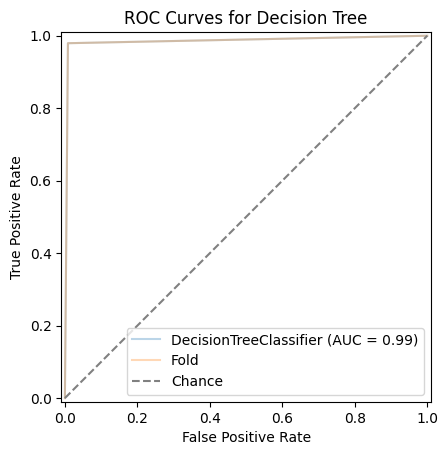

<Figure size 1000x800 with 0 Axes>

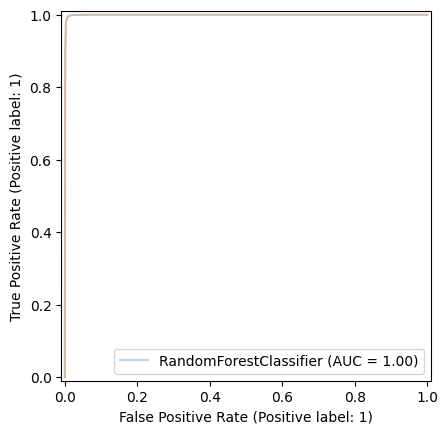

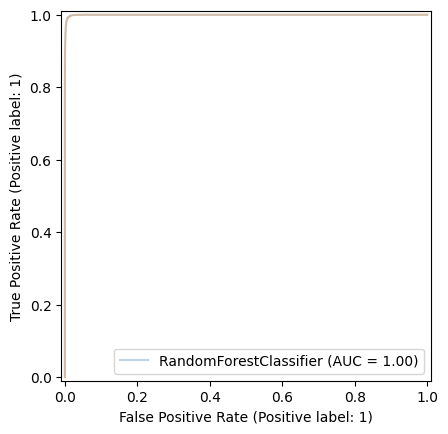

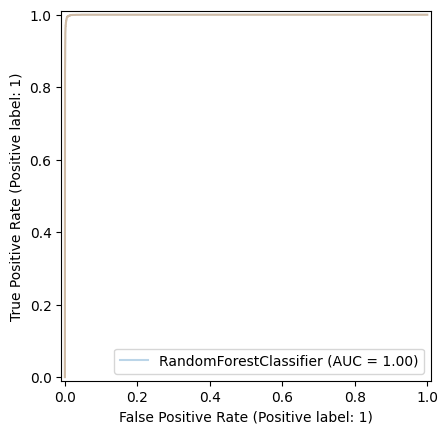

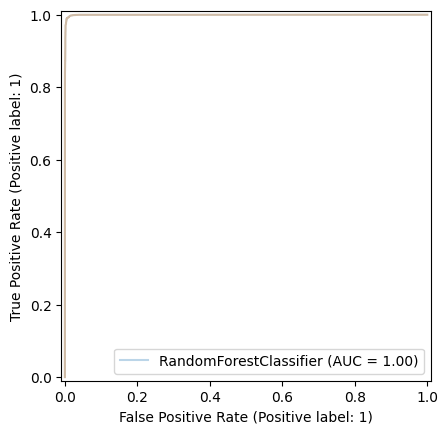

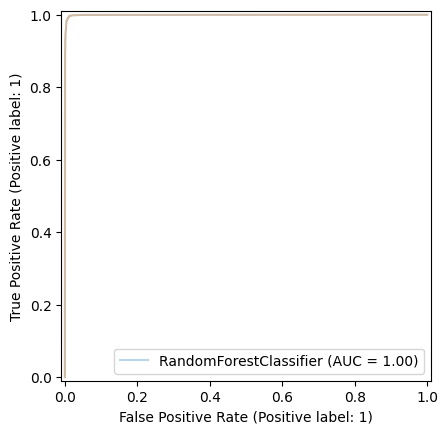

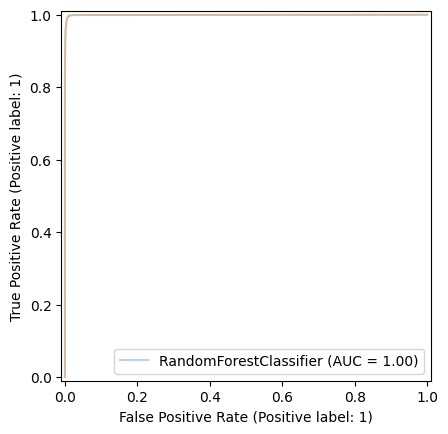

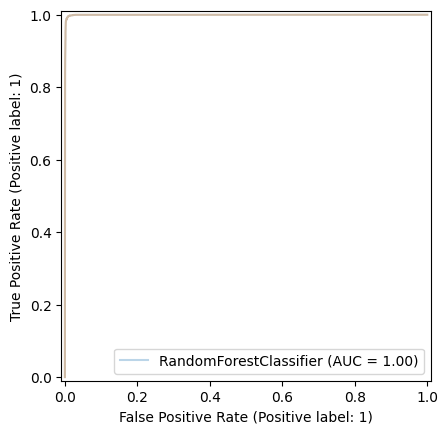

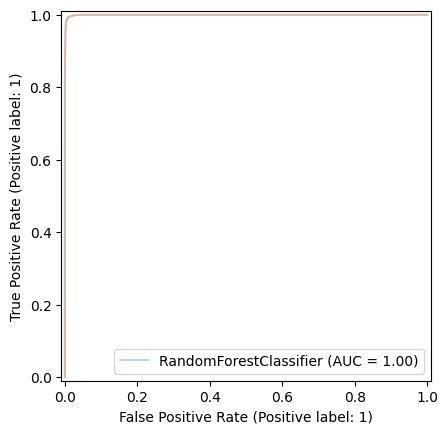

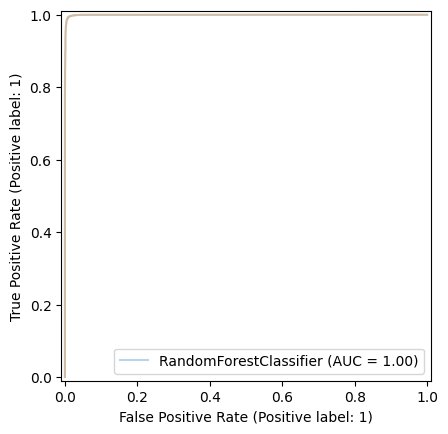

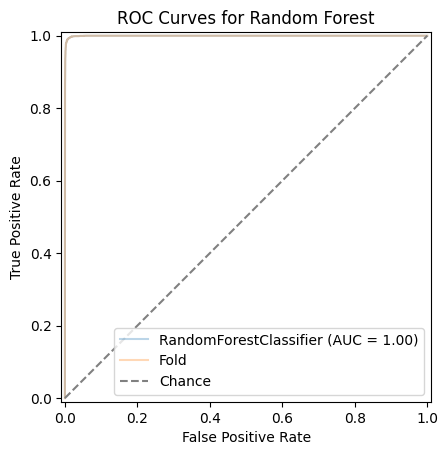

<Figure size 1000x800 with 0 Axes>

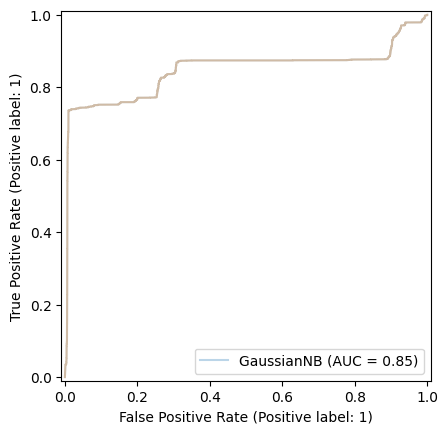

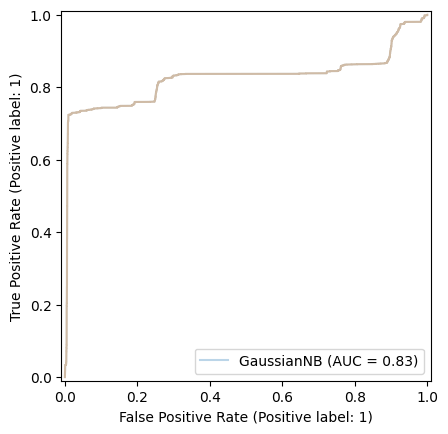

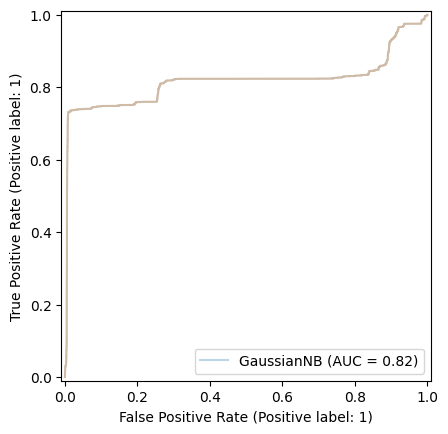

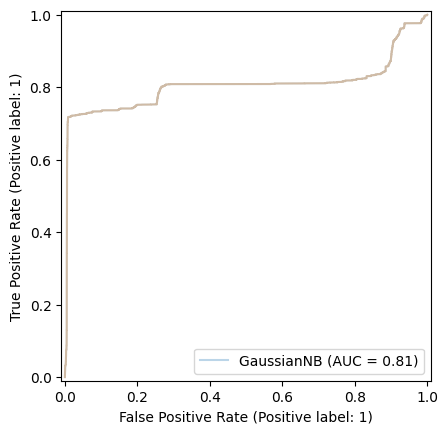

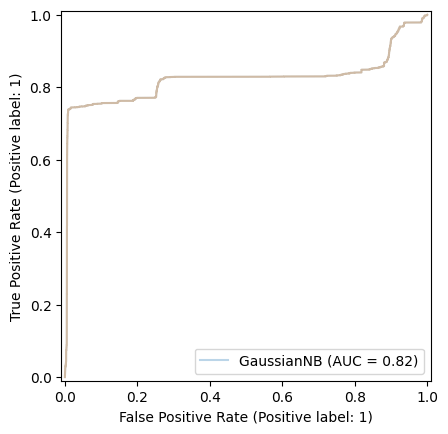

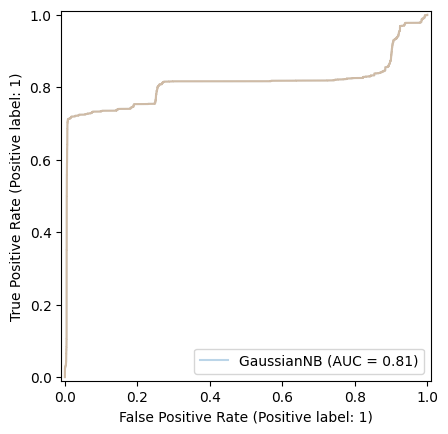

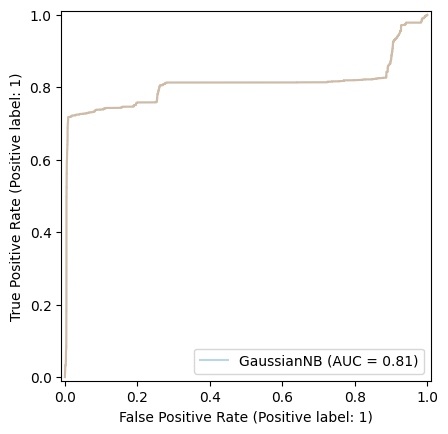

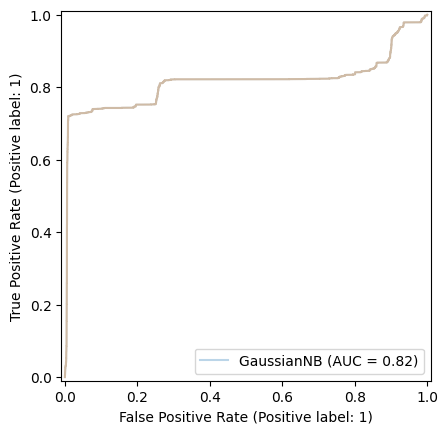

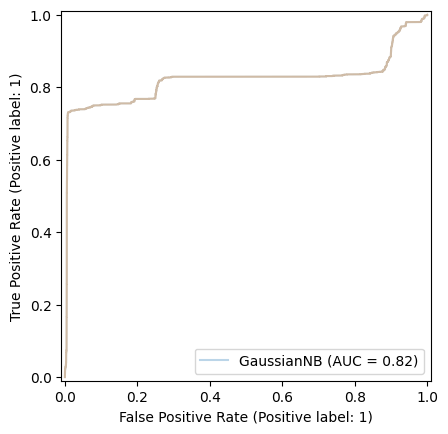

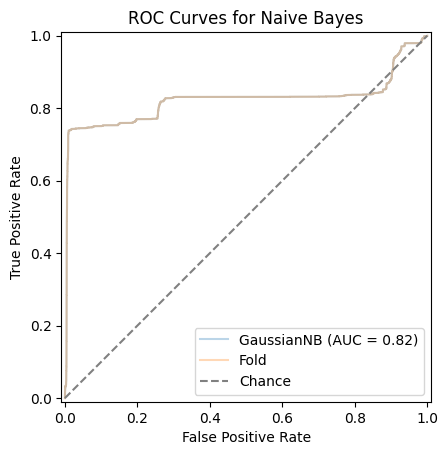

<Figure size 1000x800 with 0 Axes>

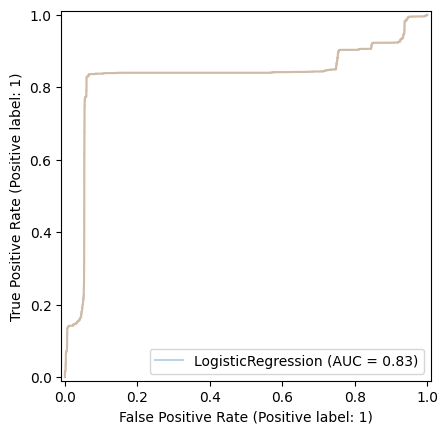

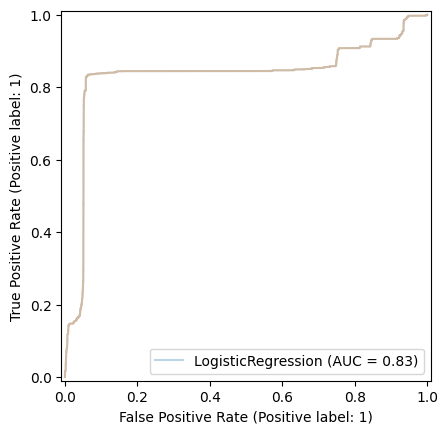

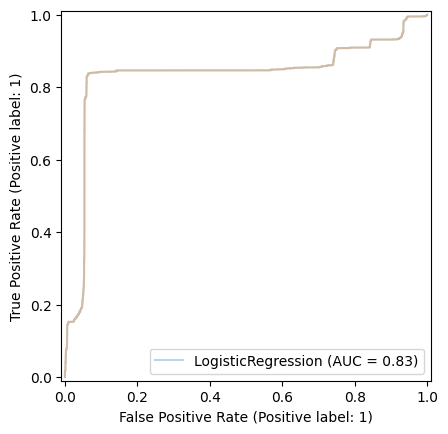

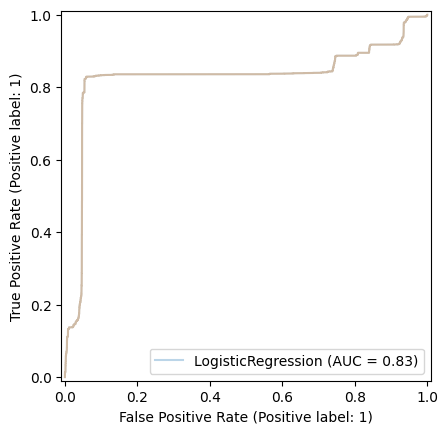

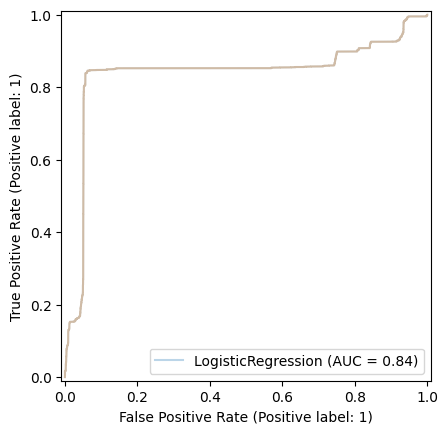

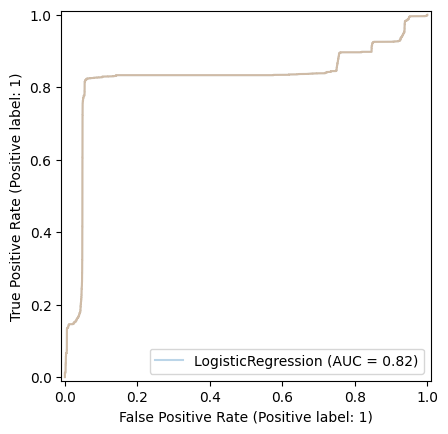

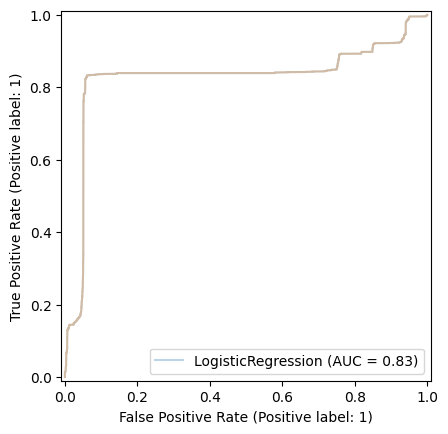

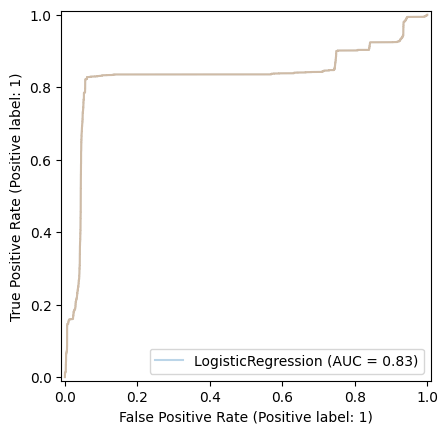

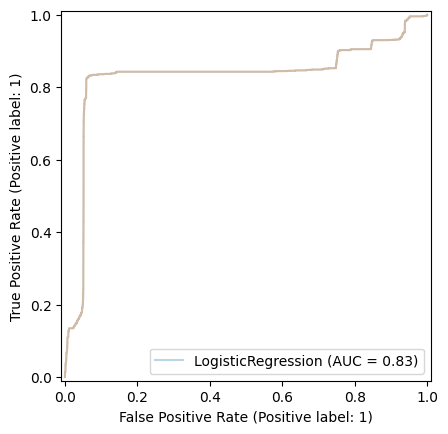

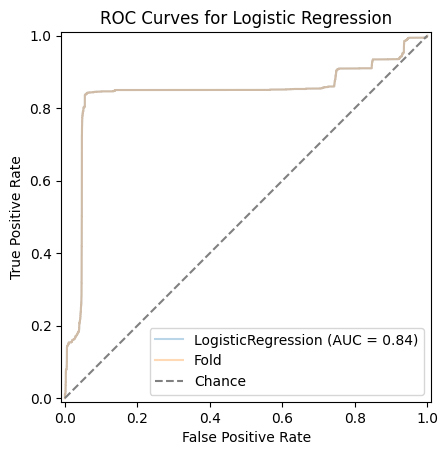

In [41]:
# Classifiers
classifiers = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Naive Bayes", GaussianNB()),
    ("Logistic Regression", LogisticRegression(random_state=42))
]

# Evaluate and plot
for name, clf in classifiers:
    evaluate_classifier(name, clf, X_A, y_A)

plot_classifier_roc_curves(classifiers, X_A, y_A)

Made By : Ulaş AKTAŞ

aktas.ulas.resmi@gmail.com

20401901

